 # Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-scientist-linkedin-job-postings/postings.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv('/kaggle/input/data-scientist-linkedin-job-postings/postings.csv', parse_dates=['first_seen'])
df = data.copy()

In [4]:
df.sample(5)

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
894,Lead Data Analyst,Serenity Healthcare,"Lehi, UT",https://www.linkedin.com/jobs/view/lead-data-a...,2023-12-20,Heber City,United States,Associate,Onsite,Serenity Healthcare is looking for a seasoned ...,"SQL, SQL Server, SSIS, PowerBI, Data Analysis,..."
1602,Data Engineer - Scala(U.S. remote),Railroad19,"Lakeland, FL",https://www.linkedin.com/jobs/view/data-engine...,2023-12-20,Lake Wales,United States,Mid senior,Remote,"Railroad19, Inc.\nis hiring\nremote\nSenior Da...","Scala, Spark, AWS, SQL, EMR, S3, Restful APIs,..."
1519,Senior Electrical Engineer - Data Center,Olsson,"Lincoln, NE",https://www.linkedin.com/jobs/view/senior-elec...,2023-12-20,Nebraska,United States,Associate,Remote,"Company Description\nWe are Olsson, a team-bas...","Electrical Engineering, Project Design, Techni..."
2332,Big Data Engineering,VRK IT Vision Inc.,"Richmond, VA",https://www.linkedin.com/jobs/view/big-data-en...,2023-12-20,Montpelier,United States,Mid senior,Onsite,"Only share candidates local to Richmond, VA wh...","Python, Scala, Streaming Data, ETL, Data Sourc..."
435,Data Scientist w/ Top Secret - Remote | WFH,Get It Recruit - Information Technology,"Arlington, VA",https://www.linkedin.com/jobs/view/data-scient...,2023-12-20,Bethesda-Chevy Chase,United States,Mid senior,Remote,Are you passionate about driving cutting-edge ...,"Data Analytics, Machine Learning, Python, R, D..."


**Removing the redundant Columns**

In [5]:
df.drop(columns = ['job_link' , 'search_city'], inplace = True)
df.head()

,job_title,company,job_location,first_seen,search_country,job level,job_type,job_summary,job_skills
0,Technical Data Analyst,Jefferson Health Plans,"Philadelphia, PA",2023-12-20,United States,Associate,Remote,Why Choose Jefferson Health Plans?\nWe are an ...,"KNIME, QlikView, SQL, MS Access, MS Excel, Log..."
1,Data Center Engineer - Minneapolis,DeRisk Technologies,"Minneapolis, MN",2023-12-20,United States,Associate,Onsite,Job Responsibilities:\nDeployment / In-Scope C...,"Server, Storage, Backup, Networking, Virtualiz..."
2,Data Analyst,Avani Tech Solutions Private Limited,"Minneapolis, MN",2023-12-20,United States,Associate,Onsite,Success Factor knowledge\nSchedule : Monday th...,"Data Management, HR Data Retention Controls, C..."
3,Data Engineer II - NBC Sports Next,NBC Sports Next,"Minneapolis, MN",2023-12-20,United States,Associate,Remote,Company Description\nNBC Sports Next is where ...,"Data Engineering, Data Warehousing, SQL, MySQL..."
4,Data Analyst - Operational Assessment,National Grid Renewables,"Bloomington, MN",2023-12-20,United States,Associate,Hybrid,National Grid Renewables is a leading North Am...,"Data Analyst, Operational Assessment, Wind Ene..."


# Getting Basic info Of Data

In [6]:
df.shape

(4342, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4342 entries, 0 to 4341
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   job_title       4342 non-null   object        
 1   company         4342 non-null   object        
 2   job_location    4342 non-null   object        
 3   first_seen      4342 non-null   datetime64[ns]
 4   search_country  4342 non-null   object        
 5   job level       4342 non-null   object        
 6   job_type        4342 non-null   object        
 7   job_summary     4338 non-null   object        
 8   job_skills      4336 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 305.4+ KB


In [8]:
df.isnull().sum()

job_title         0
company           0
job_location      0
first_seen        0
search_country    0
job level         0
job_type          0
job_summary       4
job_skills        6
dtype: int64

# **Filling Missing values**

In [9]:
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum())


job_title         0
company           0
job_location      0
first_seen        0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
dtype: int64


/tmp/ipykernel_17/307109041.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# We have multiple skills listed out in the Job posting on LinkedIn for the Data Science domain.

We will be getting top most skills required and plot a graph for the same.

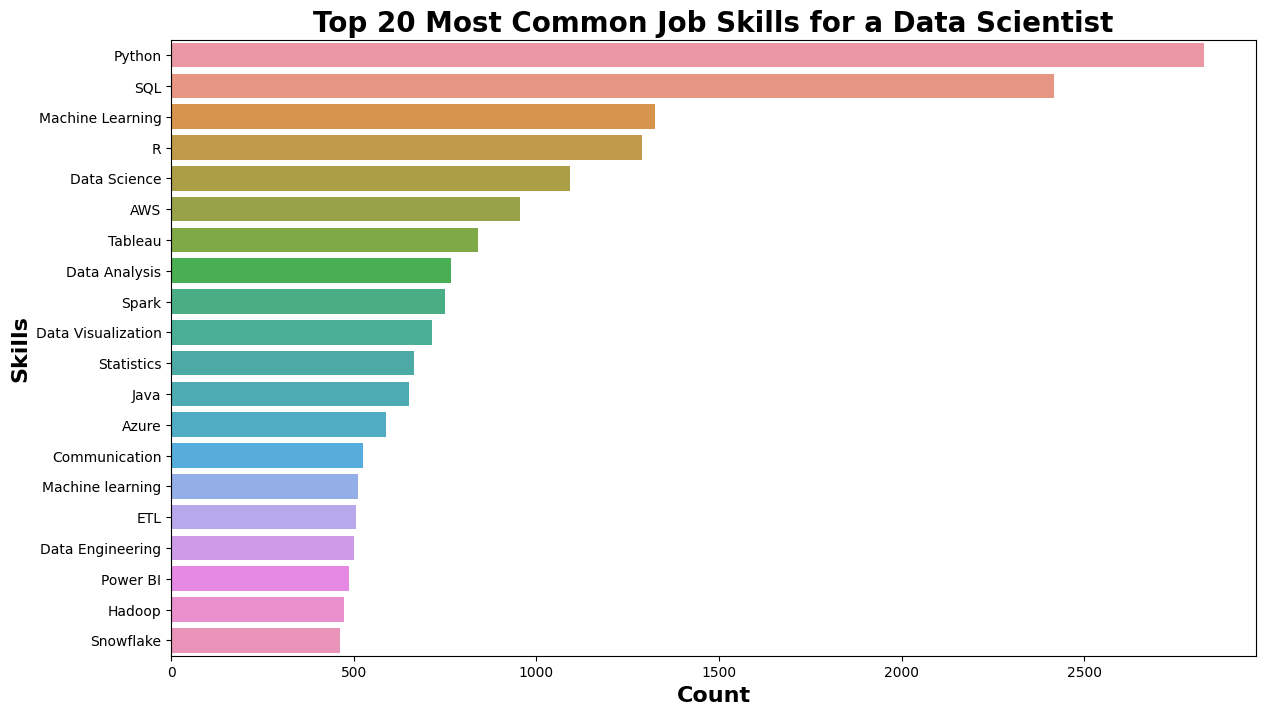

In [10]:
#Most Common Skillset For Data Scientist
df['job_skills'].astype(str)
df['Individual Skill'] = df['job_skills'].str.split(', ')
df_exploded = df.explode('Individual Skill')

skills_count = df_exploded['Individual Skill'].value_counts().reset_index()
skills_count.columns = ['Skill', 'Count']

plt.figure(figsize=(14, 8))
sns.barplot(data=skills_count.head(20), x='Count', y='Skill')
plt.title('Top 20 Most Common Job Skills for a Data Scientist', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=16, fontweight='bold')
plt.ylabel('Skills', fontsize=16, fontweight='bold')
plt.show()

****As seen in the above graph, we can conclude that if a fresher or a person who wants to switch into Data Science domain, can start learning the top skills that are posted by the Employer or in the job postings, and can start acquiring these skills.****

# ****We have multiple Job Titles on the LinkedIn postings, we want to analyze the top 10 in-demand job titles that the employers are looking for.****

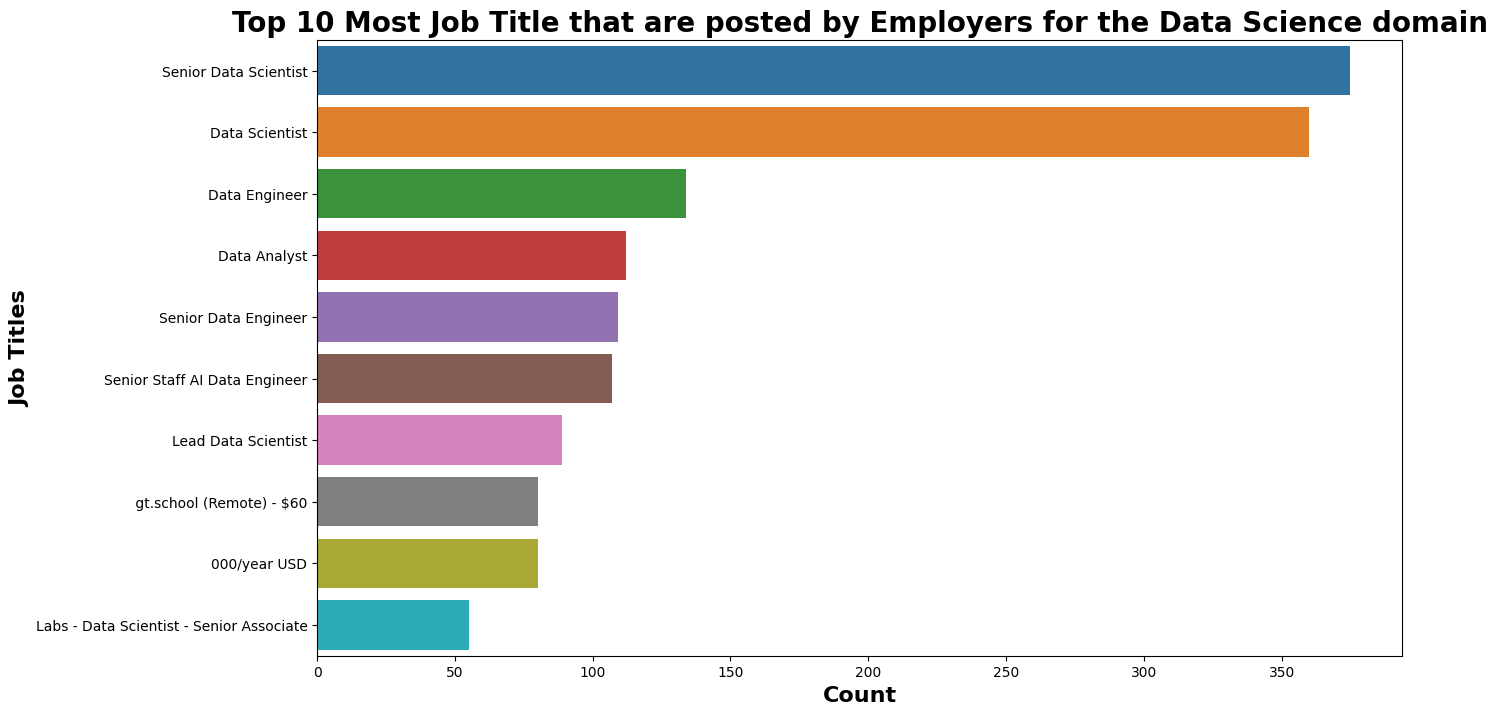

In [11]:
df['job_title'].astype(str)
df['Individual Job Titles'] = df['job_title'].str.split(',')
df_title_exploded = df.explode('Individual Job Titles')

title_count = df_title_exploded['Individual Job Titles'].value_counts().reset_index()
title_count.columns = ['Title','Count']

plt.figure(figsize=(14,8))
sns.barplot(data=title_count.head(10), x='Count',y='Title')
plt.title('Top 10 Most Job Title that are posted by Employers for the Data Science domain', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=16, fontweight='bold')
plt.ylabel('Job Titles', fontsize=16, fontweight='bold')
plt.show()

****As seen in the barplot, these are the top most Job titles for which the Job postings have been posted.****

# ****We have multiple Job Location on the LinkedIn postings, we want to analyze the top 20 Job Location that the employers are looking for.****

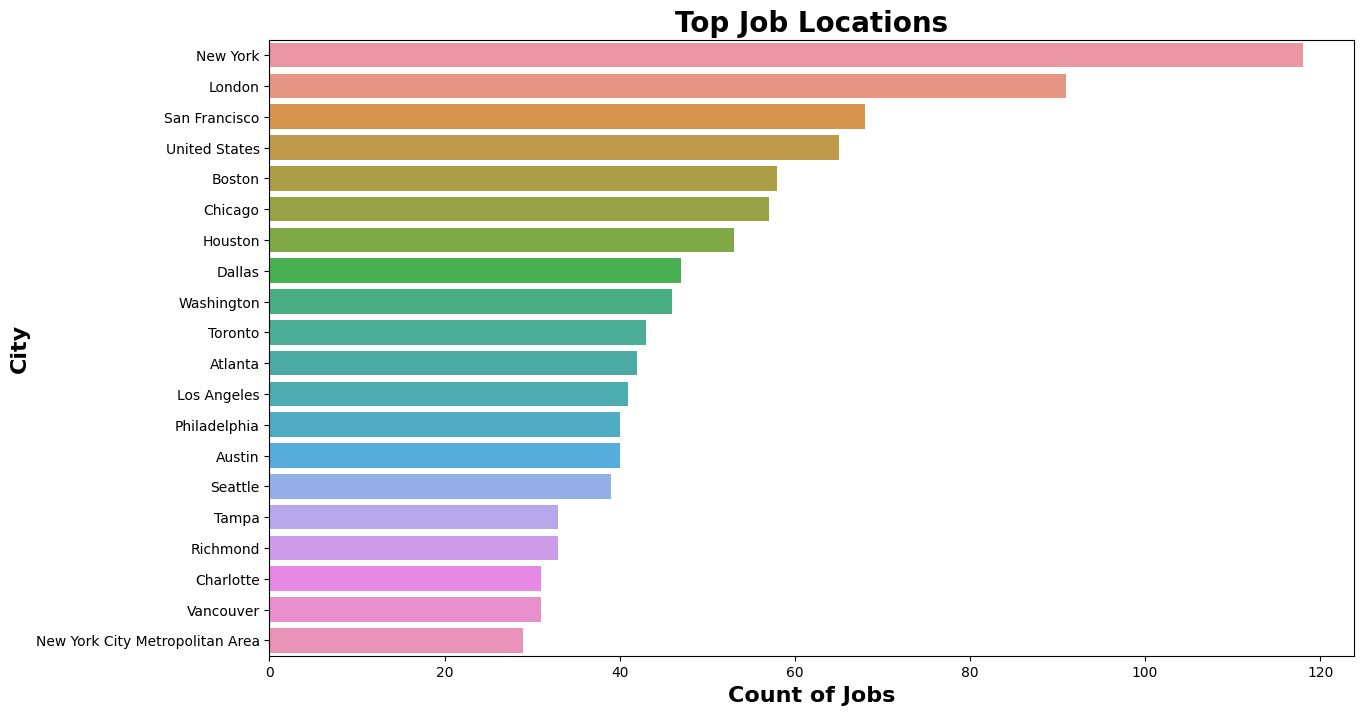

In [12]:
df['job_location'].astype(str)
df['City'] = df['job_location'].apply(lambda x: x.split(', ')[0])
df_location_exploded = df.explode('City')

city_count = df_location_exploded['City'].value_counts().reset_index()
city_count.columns = ['City', 'Count']

plt.figure(figsize=(14, 8))
sns.barplot(data=city_count.head(20), x='Count', y='City')
plt.title('Top Job Locations', fontsize=20, fontweight='bold')
plt.xlabel('Count of Jobs', fontsize=16, fontweight='bold')
plt.ylabel('City', fontsize=16, fontweight='bold')
plt.show()


****The top job locations for Data Science domain include cities such as New York, London, San Francisco, Boston, etc.****

# ****Let us find out distribution of job types****

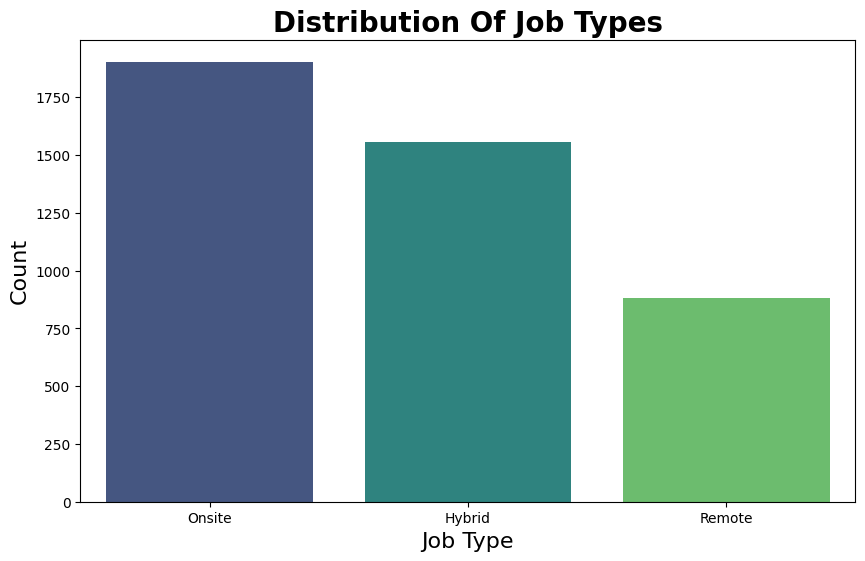

In [13]:
job_type_count = df['job_type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=job_type_count.index,y=job_type_count.values,palette='viridis')
plt.title('Distribution Of Job Types', fontsize=20,fontweight='bold')
plt.xlabel('Job Type',fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

****As seen in the above plot, you can see most of the Data scinece domain jobs are Onsite and a very few Remote jobs.****

# ****Let us look at the distribution of Job levels****

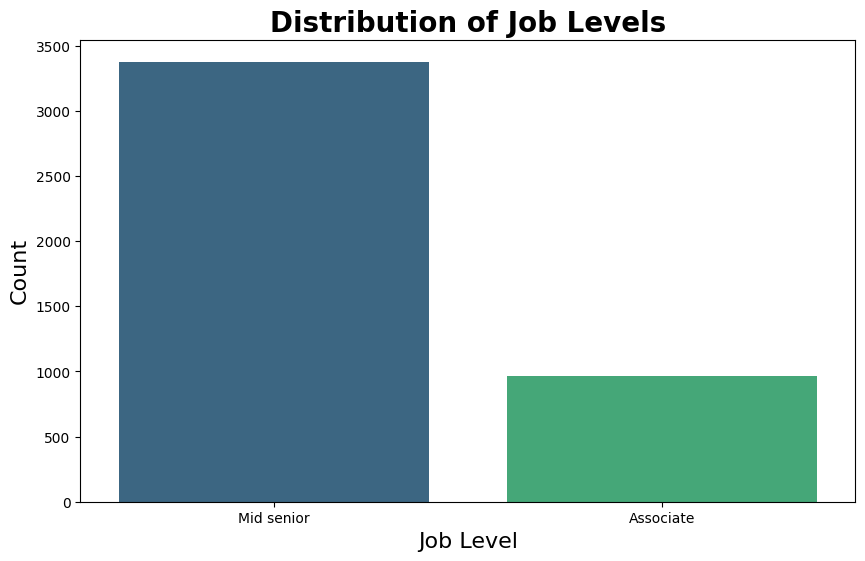

In [14]:
job_level_count = df['job level'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=job_level_count.index, y=job_level_count.values, palette='viridis')
plt.title('Distribution of Job Levels', fontsize=20, fontweight='bold')
plt.xlabel('Job Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

****As seen in the above plot, the job postings on LinkedIn have a very high openings for Mid-Senior level jobs and a very few Associate level jobs. So if you're fresher or someone who wants to switch their Domain, one will have stand out by showcasing their work & skills.****

# ****Let us look at the Job Type distribution by Location****

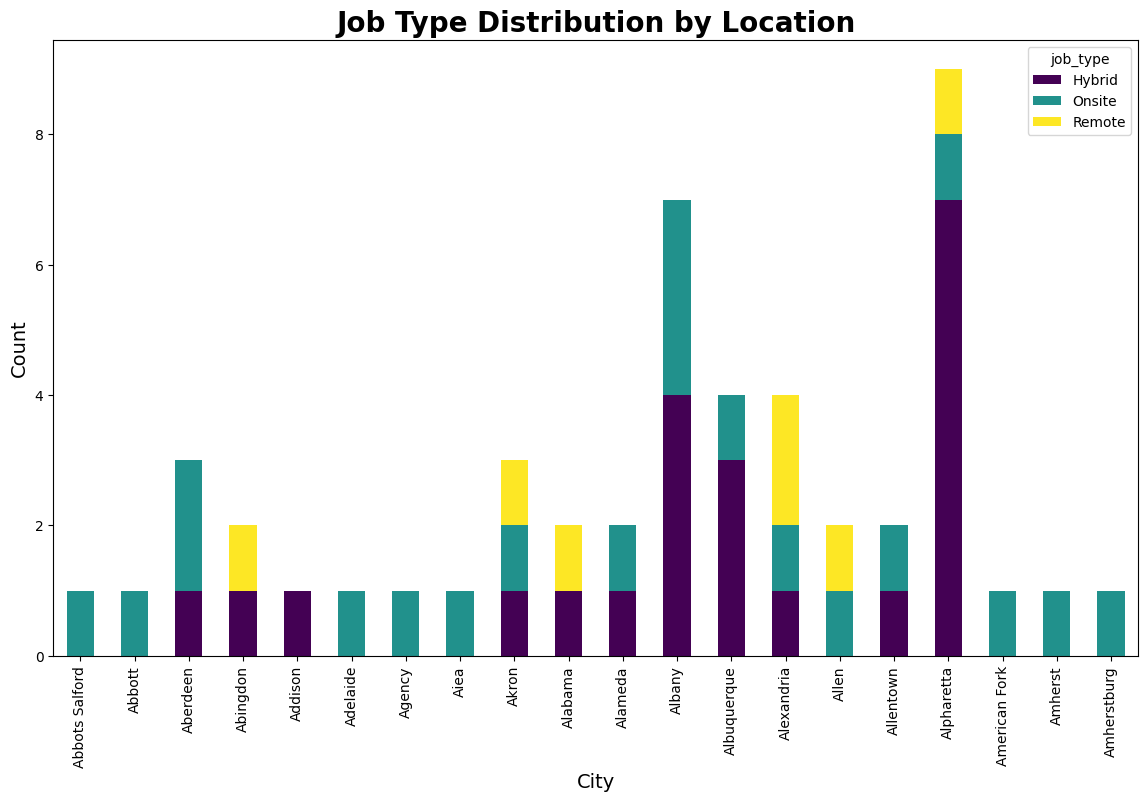

In [15]:
job_type_by_location = df.groupby(['City', 'job_type']).size().unstack(fill_value=0).head(20)

# Plot the data
job_type_by_location.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Job Type Distribution by Location', fontsize=20, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

****As seen in the above graph, we can see that 'Alpharetta' has the highest number of Hybrid jobs, while 'Albany' has the highest number of Onsite jobs and 'Alexandria' has the highest number of Remote jobs as compared to other cities.****

# ****Let us look at the Job level distribution by job type.****

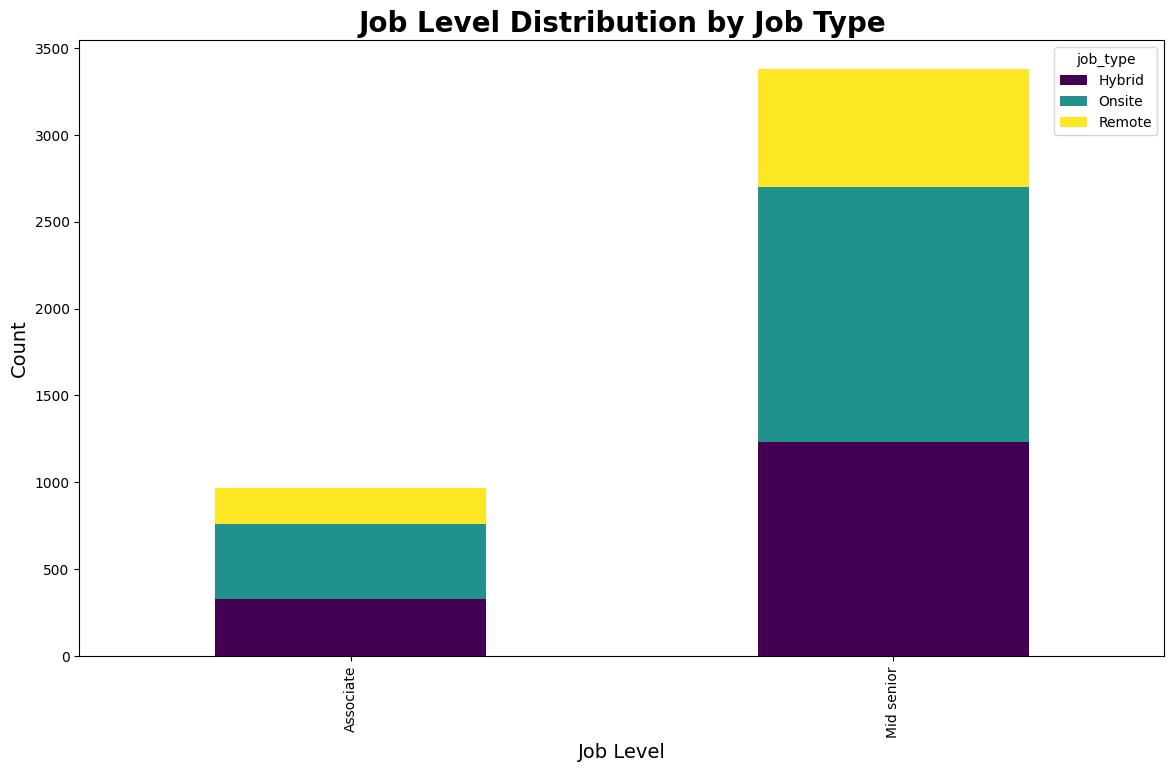

In [16]:
job_level_by_type = df.groupby(['job level', 'job_type']).size().unstack(fill_value=0)

# Plot the data
job_level_by_type.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Job Level Distribution by Job Type', fontsize=20, fontweight='bold')
plt.xlabel('Job Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()